# JORGE NAVARRO GONZÁLEZ - MARIO UBIERNA SAN MAMÉS

## Práctica 8 - MODELO DE RED ALEATORIA DE GILBERT

In [9]:
#Importaciones
import networkx as nx
import matplotlib.pyplot as plt
import random as random
import numpy as np
import itertools
import math
from scipy import stats

#### 1 Modelo Gilbert (1959)

E:\Users\Jorge\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


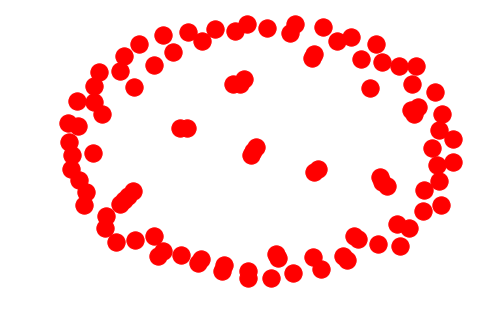

In [2]:
# 1.1 Implementar en una función de python el algoritmo de generación de redes aleatorias de Gilbert G(N,p)

def generar_probabilidad():
    return random.uniform(0,1)

def gilbert(probabilidad, nodos=10):
    
    G = nx.Graph(nombre='grafo') 
    G.add_nodes_from(list(range(nodos)))
    
    for i in itertools.combinations(list(range(nodos)), 2):    
        if generar_probabilidad() < probabilidad:
            G.add_edge(i[0],i[1])
    return G

G = gilbert(0.005, 100)
nx.draw(G)

In [3]:
# 1.2 Para una red generada mediante el modelo anterior G(100,0.005) calcular los estadísticos:
n_nodos = G.number_of_nodes()
n_enlaces  = G.number_of_edges()
grados_nodos = []
gradoMedio = 0
gradoMaximo = 0
clustering_medio = nx.average_clustering(G)

for nodo in G.nodes():
    gradoMedio += G.degree(nodo)
    grados_nodos.append(G.degree(nodo))
    
print("El número de nodos son: " +str(n_nodos))
print("El número de enlaces son: "+str(n_enlaces))
print("El grado medio es: " +str(sum(grados_nodos)/n_nodos))
print("El grado máximo es: " + str(max(grados_nodos)))
print("El grado mínimo es: " + str(min(grados_nodos)))
print("El grado medio de clustering es: " + str(clustering_medio))

El número de nodos son: 100
El número de enlaces son: 21
El grado medio es: 0.42
El grado máximo es: 2
El grado mínimo es: 0
El grado medio de clustering es: 0.0


#### 2 Distribución de grado

(array([60.,  0.,  0., 34.,  0.,  0.,  4.,  0.,  0.,  2.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

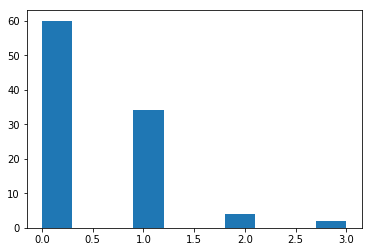

In [4]:
# 2.1 2.1 Represente la distribución de grado de distintas realizaciones del modelo G(100,p) para los siguientes valores de p={0.005,0.05,0.5}. ¿Qué distribución de probabilidad sigue la distribución de grado?

def grados_nodos(G):
    grados = []
    for nodo in G.nodes():
        grados.append(G.degree(nodo))
    return grados

# Representación de la distribución para 100 nodos y p=0.005
G = gilbert(0.005, 100)
plt.hist(grados_nodos(G))


(array([ 3., 14., 18., 11., 32., 10.,  2.,  3.,  5.,  2.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

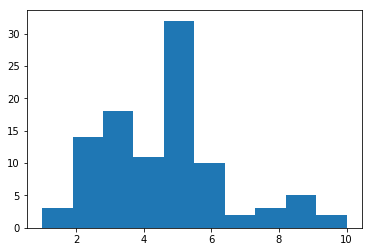

In [5]:
# Representación de la distribución para 100 nodos y p=0.05
G = gilbert(0.05, 100)
plt.hist(grados_nodos(G))

(array([ 1.,  6.,  5., 17., 21., 21., 15.,  9.,  2.,  3.]),
 array([36. , 38.6, 41.2, 43.8, 46.4, 49. , 51.6, 54.2, 56.8, 59.4, 62. ]),
 <a list of 10 Patch objects>)

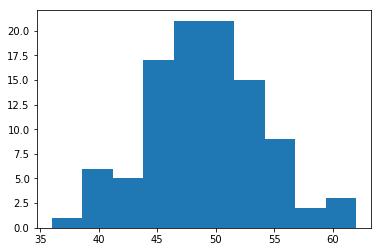

In [6]:
# Representación de la distribución para 100 nodos y p=0.5
G = gilbert(0.5, 100)
plt.hist(grados_nodos(G))

In [7]:
# ¿Qué distribución de probabilidad sigue la distribución de grado?
# Sigue la distribución de Poisson, ya que nos permite determinar el número de hechos que se pueden producir
# en un intervalo, bajo una cierta aleatoriedad.

#### 3 Aparición del componente gigante

In [11]:
nodos = 1000
conj_valores_kj=np.linspace(0,math.log(nodos),num=50)

maxCom=0
calculo=[]

#Replicas y dividir kj/nodos como dice en los apuntes a tener en cuenta
replicas = 30
valor_pj = conj_valores_kj/nodos

for pj in valor_pj:
    maximoCom = []
    for i in range(replicas):
        #prob.append(pj)
        G=gilbert(pj, 1000)
        #bucle de los apuntes a tener en cuenta
        maxCom=np.max([len(c) for c in nx.components.connected_components(G)])
        maximoCom.append(maxCom)
    media_ng = np.mean(maximoCom)
    division_ng_nodos = media_ng / nodos
    calculo.append(division_ng_nodos)

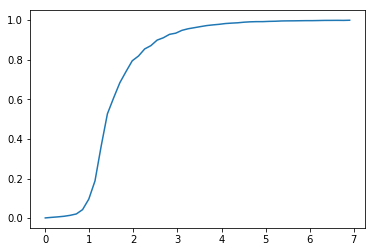

In [12]:
plt.plot(conj_valores_kj,calculo)